In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid",context="notebook")
plt.rcParams['figure.figsize'] = (10,5)

In [2]:
df = pd.read_csv('amazon_sales_2025.csv')
df

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10/3/2025,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending
...,...,...,...,...,...,...,...,...,...,...,...
245,ORD0246,17-03-25,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,30-03-25,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,5/3/2025,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,8/3/2025,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled


In [5]:
df.head()
df.tail()
df.shape
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


,0
Order ID,object
Date,object
Product,object
Category,object
Price,int64
Quantity,int64
Total Sales,int64
Customer Name,object
Customer Location,object
Payment Method,object


In [7]:
df.describe()

,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,250.0,343.580,380.635808,15.0,40.0,150.0,600.0,1200.0
Quantity,250.0,2.856,1.429489,1.0,2.0,3.0,4.0,5.0
Total Sales,250.0,975.380,1252.112254,15.0,100.0,400.0,1500.0,6000.0


In [9]:
df.isnull().sum()

,0
Order ID,0
Date,0
Product,0
Category,0
Price,0
Quantity,0
Total Sales,0
Customer Name,0
Customer Location,0
Payment Method,0


In [10]:
# Check percentage of missing data

missing_df = df.isnull().sum().reset_index()
missing_df.columns = ['column', 'Missing_Values']
missing_df['Missing_Percent'] = (missing_df['Missing_Values'] / len(df)) * 100
missing_df.sort_values('Missing_Percent', ascending=False)

,column,Missing_Values,Missing_Percent
0,Order ID,0,0.0
1,Date,0,0.0
2,Product,0,0.0
3,Category,0,0.0
4,Price,0,0.0
5,Quantity,0,0.0
6,Total Sales,0,0.0
7,Customer Name,0,0.0
8,Customer Location,0,0.0
9,Payment Method,0,0.0


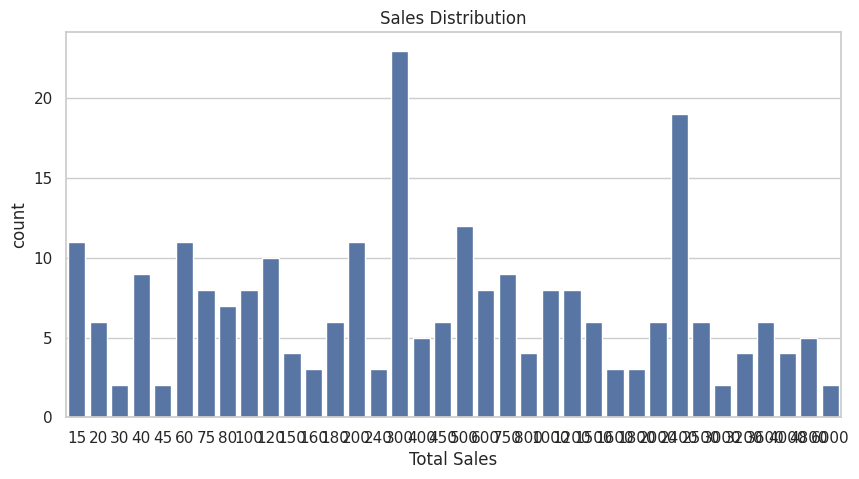

In [12]:
# Target variable analysis

df['Product'].value_counts(normalize=True) * 100
sns.countplot(x='Total Sales',data=df)
plt.title("Sales Distribution")
plt.show()